<a href="https://colab.research.google.com/github/AnnaK8090/CIND-820_Big-Data-Analytics-Project/blob/main/CIND_820_Big_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
customersDF = pd.read_csv("olist_customers_dataset.csv")
geolocationDF = pd.read_csv("olist_geolocation_dataset.csv")
order_itemsDF = pd.read_csv("olist_order_items_dataset.csv")
order_paymentsDF = pd.read_csv("olist_order_payments_dataset.csv")
order_reviewsDF = pd.read_csv("olist_order_reviews_dataset.csv")
ordersDF = pd.read_csv("olist_orders_dataset.csv")
productsDF = pd.read_csv("olist_products_dataset.csv")
sellersDF = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

In [3]:
customersDF.describe()
geolocationDF.describe()
order_itemsDF.describe()
order_paymentsDF.describe()
order_reviewsDF.describe()
ordersDF.describe()
productsDF.describe()
sellersDF.describe()
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [4]:
customersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
masterDF = ordersDF.copy()
masterDF = masterDF.merge(customersDF,on='customer_id')
masterDF = masterDF.merge(order_reviewsDF,on='order_id')
masterDF = masterDF.merge(order_paymentsDF,on='order_id')
masterDF = masterDF.merge(order_itemsDF,on='order_id')
masterDF = masterDF.merge(productsDF,on='product_id')
masterDF = masterDF.merge(sellersDF,on='seller_id')
masterDF = masterDF.merge(product_category_name_translation,on='product_category_name')
masterDF.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares


In [6]:
masterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  review_id                     

In [7]:
masterDF.shape

(115609, 40)

In [8]:
#masterDF.drop(masterDF.columns.difference(['customer_id','review_id',"review_score"]), 1, inplace=True)
masterDF = masterDF.loc[:, masterDF.columns.intersection(['review_id','review_score','customer_id','product_id','product_category_name'])]
masterDF.shape

(115609, 5)

In [9]:
masterDF.head(10)

,customer_id,review_id,review_score,product_id,product_category_name
0,9ef432eb6251297304e76186b10a928d,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,9ef432eb6251297304e76186b10a928d,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
2,9ef432eb6251297304e76186b10a928d,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,a20e8105f23924cd00833fd87daa0831,b46f1e34512b0f4c74a72398b03ca788,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,26c7ac168e1433912a51b924fbd34d34,dc90f19c2806f1abba9e72ad3c350073,5,87285b34884572647811a353c7ac498a,utilidades_domesticas
5,53904ddbea91e1e92b2b3f1d09a7af86,1bafb430e498b939f258b9c9dbdff9b1,3,87285b34884572647811a353c7ac498a,utilidades_domesticas
6,a7260a6ccba78544ccfaf43f920b7240,8899ca945efd951c97107b4966289227,1,be03d93320192443b8fa24c0ca6ead98,utilidades_domesticas
7,50fd5707c28d0a64dc20d67f937dd9ba,4b70092fc12f2328972d5ff1022d87e9,4,8415b1dae10d2dcb36beec370c6a90cd,utilidades_domesticas
8,a286f46d6e54cc0179bbb0ee07b0df5e,b9e086024ceb0234e5950016497a4928,5,5e18248fc768bdb7fc69fd012068d109,utilidades_domesticas
9,2a3caad976ff659d519660a7c9357122,abf7167b43e3978411cfaa0f77e5d21b,3,883cea107372a7f07b5830904f74952d,utilidades_domesticas


In [10]:
rating=masterDF.drop_duplicates()

In [11]:
rating.shape

(100750, 5)

In [12]:
rating.head()

,customer_id,review_id,review_score,product_id,product_category_name
0,9ef432eb6251297304e76186b10a928d,a54f0611adc9ed256b57ede6b6eb5114,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,a20e8105f23924cd00833fd87daa0831,b46f1e34512b0f4c74a72398b03ca788,4,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,26c7ac168e1433912a51b924fbd34d34,dc90f19c2806f1abba9e72ad3c350073,5,87285b34884572647811a353c7ac498a,utilidades_domesticas
5,53904ddbea91e1e92b2b3f1d09a7af86,1bafb430e498b939f258b9c9dbdff9b1,3,87285b34884572647811a353c7ac498a,utilidades_domesticas
6,a7260a6ccba78544ccfaf43f920b7240,8899ca945efd951c97107b4966289227,1,be03d93320192443b8fa24c0ca6ead98,utilidades_domesticas


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

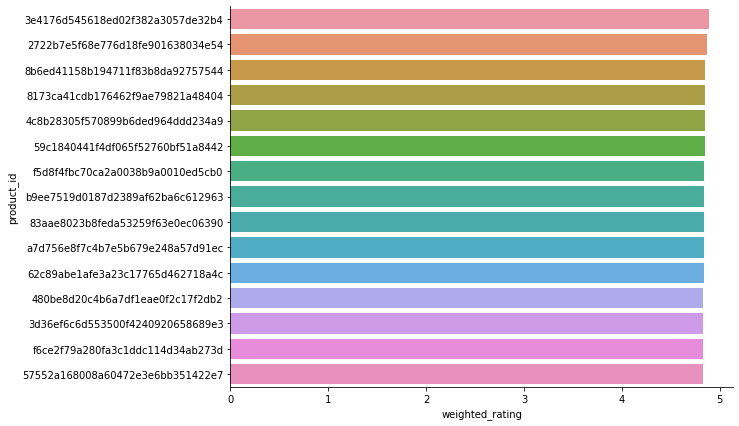

In [14]:
def weighted_rating(v,m,R,C):
    '''
Calculate the weighted rating
    
    Args:
    v -> average rating for each item (float)
    m -> minimum votes required to be classified as popular (float)
    R -> average rating for the item (pd.Series)
    C -> average rating for the whole dataset (pd.Series)
    
    Returns:
    pd.Series

    '''
    return ( (v / (v + m)) * R) + ( (m / (v + m)) * C )

def assign_popular_based_score(rating_df, user_col, item_col, rating_col):
    '''
    Assigned popular based score based on the weighted average.
    
    Args:
    rating -> pd.DataFrame contains ['item_id', 'rating'] for each user.
    
    Returns
    popular_items -> pd.DataFrame contains item and weighted score.
    '''
    
    # pre processing
    vote_count = (
        rating_df
        .groupby(item_col,as_index=False)
        .agg( {user_col:'count', rating_col:'mean'} )
        )
    vote_count.columns = [item_col, 'vote_count', 'avg_rating']
    
    # calcuate input parameters
    C = np.mean(vote_count['avg_rating'])
    m = np.percentile(vote_count['vote_count'], 70)
    vote_count = vote_count[vote_count['vote_count'] >= m]
    R = vote_count['avg_rating']
    v = vote_count['vote_count']
    vote_count['weighted_rating'] = weighted_rating(v,m,R,C)
    
    # post processing
    vote_count = vote_count.merge(rating, on = [item_col], how = 'left')
    popular_items = vote_count.loc[:,[item_col, 'vote_count', 'avg_rating', 'weighted_rating']]
    
    return popular_items

# init constant
USER_COL = 'customer_id'
ITEM_COL = 'product_id'
RATING_COL = 'review_score'

# calcualte popularity based
pop_items = assign_popular_based_score(rating, USER_COL, ITEM_COL, RATING_COL)
pop_items = pop_items.sort_values('weighted_rating', ascending = False)
new=pop_items.drop_duplicates()
# plot the popularity based on the weighted score
fix, ax = plt.subplots(figsize=(9,7))
sns.barplot(data = new.head(15),
            y = 'product_id',
            x = 'weighted_rating');
sns.despine();



In [15]:
import scipy as scipy
from scipy import stats

In [16]:
# Checking for outliers in Review Score.  
z=np.abs(stats.zscore(rating["review_score"]))
threshold=3
print(np.where(z>3))

(array([], dtype=int64),)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f630fa76c50>]],
      dtype=object)

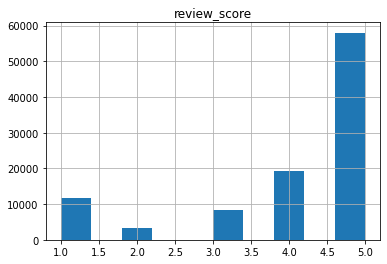

In [17]:
rating.hist("review_score")

In [18]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import itertools

from surprise import accuracy
from collections import defaultdict

class RecommenderMetrics:

    def MAE(predictions):
        return accuracy.mae(predictions, verbose=False)

    def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)

    def GetTopN(predictions, n=10, minimumRating=4.0):
        topN = defaultdict(list)


        for userID, productID, actualRating, estimatedRating, _ in predictions:
            if (estimatedRating >= minimumRating):
                topN[int(userID)].append((int(productID), estimatedRating))

        for userID, ratings in topN.items():
            ratings.sort(key=lambda x: x[1], reverse=True)
            topN[int(userID)] = ratings[:n]

        return topN

    def HitRate(topNPredicted, leftOutPredictions):
        hits = 0
        total = 0

        # For each left-out rating
        for leftOut in leftOutPredictions:
            userID = leftOut[0]
            leftOutProductID = leftOut[1]
            # Is it in the predicted top 10 for this user?
            hit = False
            for productID, predictedRating in topNPredicted[int(userID)]:
                if (int(leftOutProductID) == int(productID)):
                    hit = True
                    break
            if (hit) :
                hits += 1

            total += 1

        # Compute overall precision
        return hits/total

    def CumulativeHitRate(topNPredicted, leftOutPredictions, ratingCutoff=0):
        hits = 0
        total = 0

        # For each left-out rating
        for userID, leftOutProductID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Only look at ability to recommend things the users actually liked...
            if (actualRating >= ratingCutoff):
                # Is it in the predicted top 10 for this user?
                hit = False
                for productID, predictedRating in topNPredicted[int(userID)]:
                    if (int(leftOutProductID) == productID):
                        hit = True
                        break
                if (hit) :
                    hits += 1

                total += 1

        # Compute overall precision
        return hits/total

    def RatingHitRate(topNPredicted, leftOutPredictions):
        hits = defaultdict(float)
        total = defaultdict(float)

        # For each left-out rating
        for userID, leftOutProductID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hit = False
            for productID, predictedRating in topNPredicted[int(userID)]:
                if (int(leftOutProductID) == productID):
                    hit = True
                    break
            if (hit) :
                hits[actualRating] += 1

            total[actualRating] += 1

        # Compute overall precision
        for rating in sorted(hits.keys()):
            print (rating, hits[rating] / total[rating])

    def AverageReciprocalHitRank(topNPredicted, leftOutPredictions):
        summation = 0
        total = 0
        # For each left-out rating
        for userID, leftOutProductID, actualRating, estimatedRating, _ in leftOutPredictions:
            # Is it in the predicted top N for this user?
            hitRank = 0
            rank = 0
            for productID, predictedRating in topNPredicted[int(userID)]:
                rank = rank + 1
                if (int(leftOutProductID) == productID):
                    hitRank = rank
                    break
            if (hitRank > 0) :
                summation += 1.0 / hitRank

            total += 1

        return summation / total

    # What percentage of users have at least one "good" recommendation
    def UserCoverage(topNPredicted, numUsers, ratingThreshold=0):
        hits = 0
        for userID in topNPredicted.keys():
            hit = False
            for productID, predictedRating in topNPredicted[userID]:
                if (predictedRating >= ratingThreshold):
                    hit = True
                    break
            if (hit):
                hits += 1

        return hits / numUsers

    def Diversity(topNPredicted, simsAlgo):
        n = 0
        total = 0
        simsMatrix = simsAlgo.compute_similarities()
        for userID in topNPredicted.keys():
            pairs = itertools.combinations(topNPredicted[userID], 2)
            for pair in pairs:
                product1 = pair[0][0]
                product2 = pair[1][0]
                innerID1 = simsAlgo.trainset.to_inner_iid(str(product1))
                innerID2 = simsAlgo.trainset.to_inner_iid(str(product2))
                similarity = simsMatrix[innerID1][innerID2]
                total += similarity
                n += 1

        S = total / n
        return (1-S)

    def Novelty(topNPredicted, rankings):
        n = 0
        total = 0
        for userID in topNPredicted.keys():
            for rating in topNPredicted[userID]:
                productID = rating[0]
                rank = rankings[productID]
                total += rank
                n += 1
        return total / n


In [30]:

from surprise import SVD
from surprise import KNNBaseline
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
#from RecommenderMetrics import RecommenderMetrics

#ml = MovieLens()

#print("Loading movie ratings...")
#data = ml.loadMovieLensLatestSmall()

#print("\nComputing movie popularity ranks so we can measure novelty later...")
#rankings = rating.getPopularityRanks()

#print("\nComputing item similarities so we can measure diversity later...")
fullTrainSet = rating.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
simsAlgo = KNNBaseline(sim_options=sim_options)
simsAlgo.fit(fullTrainSet)

print("\nBuilding recommendation model...")
trainSet, testSet = train_test_split(rating, test_size=.25, random_state=1)

algo = SVD(random_state=10)
algo.fit(trainSet)

print("\nComputing recommendations...")
predictions = algo.test(testSet)

print("\nEvaluating accuracy of model...")
print("RMSE: ", RecommenderMetrics.RMSE(predictions))
print("MAE: ", RecommenderMetrics.MAE(predictions))

print("\nEvaluating top-10 recommendations...")

# Set aside one rating per user for testing
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

for trainSet, testSet in LOOCV.split(rating):
    print("Computing recommendations with leave-one-out...")

    # Train model without left-out ratings
    algo.fit(trainSet)

    # Predicts ratings for left-out ratings only
    print("Predict ratings for left-out set...")
    leftOutPredictions = algo.test(testSet)

    # Build predictions for all ratings not in the training set
    print("Predict all missing ratings...")
    bigTestSet = trainSet.build_anti_testset()
    allPredictions = algo.test(bigTestSet)

    # Compute top 10 recs for each user
 #   print("Compute top 10 recs per user...")
  #  topNPredicted = RecommenderMetrics.GetTopN(allPredictions, n=10)

    # See how often we recommended a movie the user actually rated
   # print("\nHit Rate: ", RecommenderMetrics.HitRate(topNPredicted, leftOutPredictions))

    # Break down hit rate by rating value
    #print("\nrHR (Hit Rate by Rating value): ")
    #RecommenderMetrics.RatingHitRate(topNPredicted, leftOutPredictions)

    # See how often we recommended a movie the user actually liked
    #print("\ncHR (Cumulative Hit Rate, rating >= 4): ", RecommenderMetrics.CumulativeHitRate(topNPredicted, leftOutPredictions, 4.0))

    # Compute ARHR
    #print("\nARHR (Average Reciprocal Hit Rank): ", RecommenderMetrics.AverageReciprocalHitRank(topNPredicted, leftOutPredictions))

#print("\nComputing complete recommendations, no hold outs...")
#algo.fit(fullTrainSet)
#bigTestSet = fullTrainSet.build_anti_testset()
#allPredictions = algo.test(bigTestSet)
#topNPredicted = RecommenderMetrics.GetTopN(allPredictions, n=10)

# Print user coverage with a minimum predicted rating of 4.0:
#print("\nUser coverage: ", RecommenderMetrics.UserCoverage(topNPredicted, fullTrainSet.n_users, ratingThreshold=4.0))

# Measure diversity of recommendations:
#print("\nDiversity: ", RecommenderMetrics.Diversity(topNPredicted, simsAlgo))

# Measure novelty (average popularity rank of recommendations):
#print("\nNovelty (average popularity rank): ", RecommenderMetrics.Novelty(topNPredicted, rankings))


AttributeError: ignored